### The shape of the logistic function

In [56]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from sklearn.datasets import load_breast_cancer
import pandas as pd
from plotnine import *

In [72]:
def print_parametrized_logstic_3d(a,b,c):
    
    def logistic_function(x,y):
        z = 1 / (1 + np.exp(-(a*x+b*y+c)))
        return z

    fig = plt.figure()
    ax = fig.gca(projection='3d')

    c_palette = cm.get_cmap("BuGn")
    values = np.arange(-15,15,5)
    for i,c in enumerate(values):
        X = np.arange(-2,2,0.1)
        Y = np.arange(-2,2,0.1)
        Z = np.asmatrix([[logistic_function(x,y) for x in X] for y in Y])
        X, Y = np.meshgrid(X, Y)


        # Plot the surface.
        ax.plot_surface(X, Y, Z,
                               linewidth=0, antialiased=False,alpha = 1,color = c_palette(i/len(values)))

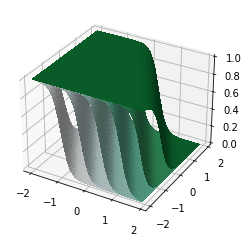

In [73]:
print_parametrized_logstic_3d(-7,-4,c = None)

In [76]:
def print_parametrized_logstic_2d(a,b):
    
    def logistic_function(x):
        z = 1 / (1 + np.exp(-(a*x+b)))
        return z

    fig = plt.figure()
    c_palette = cm.get_cmap("YlGnBu")
    values = np.arange(0,10,2)
    for i,a in enumerate(values):
        X = np.arange(-1,1,0.1)
        Y = np.asarray([logistic_function(x) for x in X])
        # Plot the surface.
        plt.plot(X, Y, antialiased=False,alpha = 1,color = c_palette(i/len(values)))

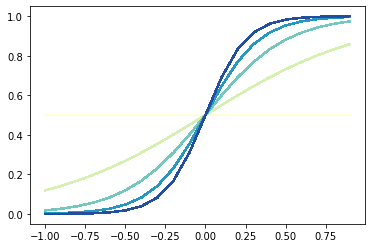

In [77]:
print_parametrized_logstic_2d(None,0)

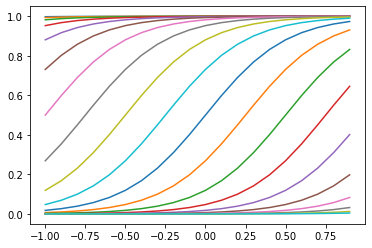

In [32]:
for a in np.arange(-10,10,1):
    x,y = logistic_function(a)
    plt.plot(x,y)
    


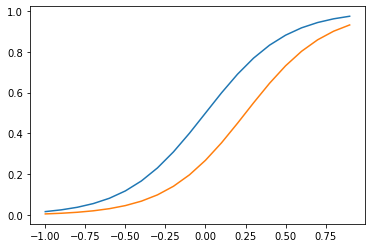

In [34]:
x,y = logistic_function(0)
plt.plot(x,y)
x,y = logistic_function(1)
plt.plot(x,y)

### The minimization problem

In [34]:
X = load_breast_cancer()["data"][:,:2]
y = load_breast_cancer()["target"]

Let's add a column of ones for the bias term:

In [35]:
def bias_and_standarize(X):
    X = (X- np.mean(X,axis = 0)) / np.std(X,axis = 0)
    X_ = np.hstack((X,np.ones((X.shape[0],1))))
    return X_
X_ = bias_and_standarize(X)

In [36]:
w = np.random.uniform(0,0.001,X_.shape[1])
probs = 1 / (1 + np.exp(-np.dot(X_,w)))

In [37]:
def logistic_linear_function(w):
    return 1 / (1 + np.exp(-np.dot(X_,w)))

def log_likelihood(w):
    probs = logistic_linear_function(w)
    return np.dot(np.log(probs),y) + np.dot(np.log(1-probs),1-y)

def gradient(w):
    return -np.dot((y - logistic_linear_function(w)),X_)

In [38]:
w_0 = [0 for i in range(X_.shape[1])]

In [39]:
from gradient_descent.gradient_descent_impl import gradient_descent_


x_iters = gradient_descent_(gamma = 0.01,function = log_likelihood,d_function = gradient,x_0 = w_0,max_steps = 40000)

The algorithm converged in 83 iters


In [40]:
log_likelihood(x_iters[-1])

-145.56166107072417

In [41]:
prediction = logistic_linear_function(x_iters[-1])

In [42]:
prediction_vs_target = pd.DataFrame({"prob_prediction":prediction,"y":y})
prediction_vs_target["class_prediction"] = np.round(prediction_vs_target["prob_prediction"])
prediction_vs_target["accuracy"] = np.where(prediction_vs_target["class_prediction"] ==prediction_vs_target["y"],1,0 )

In [43]:
np.mean(prediction_vs_target["accuracy"])

0.8910369068541301

Calibration

In [59]:
def calibration_curve(bins = 10):
    prediction_vs_target["prob_prediction_bin"] = np.round(prediction_vs_target["prob_prediction"]*bins)/bins
    mean_target_prob = prediction_vs_target.groupby(["prob_prediction_bin"])[["prob_prediction","y"]].mean().reset_index()
    plot = ggplot(mean_target_prob) + geom_line(aes(x = "prob_prediction",y = "y"))
    return plot

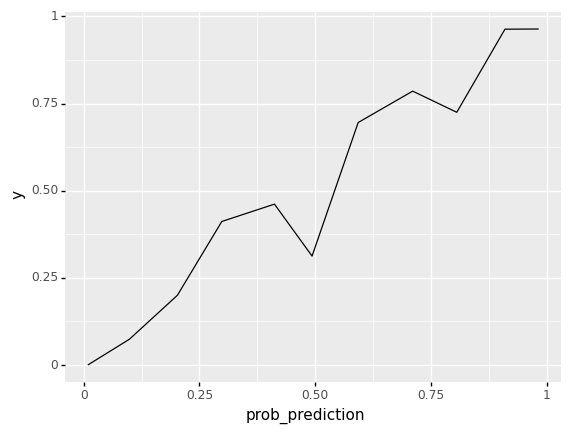

<ggplot: (8729426060352)>

In [60]:
calibration_curve(bins = 10)

In [66]:
x

array([0.        , 0.12      , 0.31578947, 0.53846154, 0.38888889,
       0.59090909, 0.70588235, 0.6875    , 0.87719298, 0.96734694])

In [83]:
model.intercept_

array([0.])

In [95]:
log_likelihood(model.coef_[0])

-30.163325248392088

In [139]:
model.

In [38]:
from statsmodels.stats.proportion import proportion_confint

In [51]:
proportion_confint(50,1000,alpha = 0.05)

(0.03649188044237944, 0.06350811955762056)

In [48]:
1000*0.05

50.0